
# The Objective of the Article
This article is designed for people who want to solve binary classification problems using Python. By the end of this article, you will have the necessary skills and techniques required to solve such problems. This article provides you with sufficient theory and practice knowledge to hone your skills.

Expectations from the Article
1. Introduction to the problem

2. Exploratory Data Analysis (EDA) and Pre-Processing

3. Model building and Feature engineering

These sections are supplemented with theory and coding examples. Additionally, you will be getting the dataset resources:

# Problem Statement
Understanding the problem statement is the first and foremost step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement.

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. In these kinds of problems, we have to predict discrete values based on a given set of independent variables (s). Classification can be of two types:

#Binary Classification:-
In this, we have to predict either of the two given classes. For example: classifying the “gender” as male or female, predicting the “result” as to win or loss, etc.
#MultiClass Classification:-  
Here we have to classify the data into three or more classes. For example: classifying a “movie’s genre” as comedy, action, or romantic, classifying “fruits” like oranges, apples, pears, etc.
Loan prediction is a very common real-life problem that each retail bank faces at least once in its lifetime. If done correctly, it can save a lot of man-hours at the end of a retail bank.

Although this course is specifically built to give you a walkthrough of the Loan Prediction problem, you can always refer to the content to get a comprehensive overview to solve a classification problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train=pd.read_csv("/content/drive/MyDrive/Loan_Datasets/train_ctrUa4K.csv")
test=pd.read_csv("/content/drive/MyDrive/Loan_Datasets/test_lAUu6dG.csv")

Let’s make a copy of the train and test data so that even if we change anything in these datasets we would not lose the original datasets.

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see there are three formats of data types:

**object**: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

**int64**: It represents the integer variables. ApplicantIncome is of this format.

**float64**: It represents the variable that has some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

In [8]:
train.shape


(614, 13)

In [9]:
test.shape

(367, 12)

#Univariate Analysis
In this section, we will do a univariate analysis. It is the easiest form of analyzing data where we analyze each variable individually. For categorical features, we can use frequency tables or bar plots to calculate the number of each category in a particular variable. Probability Density Functions(PDF) can be used to look at the distribution of the numerical variables.

#Target Variable
We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

The frequency table of a variable will give us the count of each category in that variable.

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

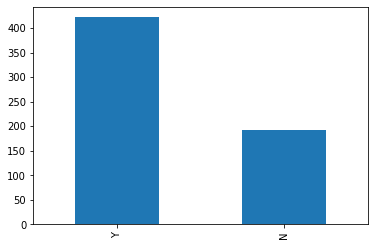

In [12]:
train['Loan_Status'].value_counts().plot.bar()

Now, let’s visualize each variable separately. Different types of variables are Categorical, ordinal, and numerical.

**Categorical features (Independent variable)**: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

**Ordinal features**: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

**Numerical features**: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

#Let’s visualize the categorical and ordinal features first.

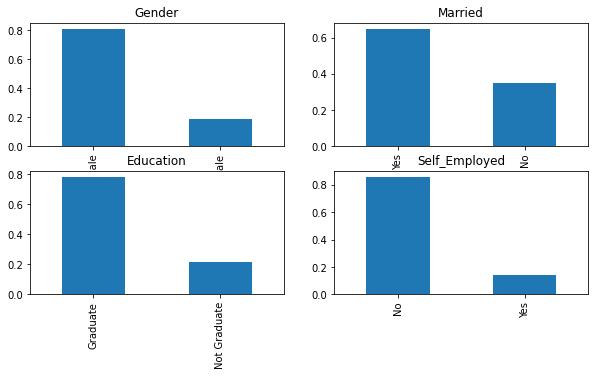

In [13]:
plt.figure(1)
plt.subplot(2,2,1) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5), title= 'Gender') 
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Married')
plt.subplot(2,2,3)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Education')
plt.subplot(2,2,4)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Self_Employed')
plt.show()

#Independent Variable (Numerical)
Till now we have seen the categorical and ordinal variables and now let’s visualize the numerical variables. Let’s look at the distribution of Applicant income first.


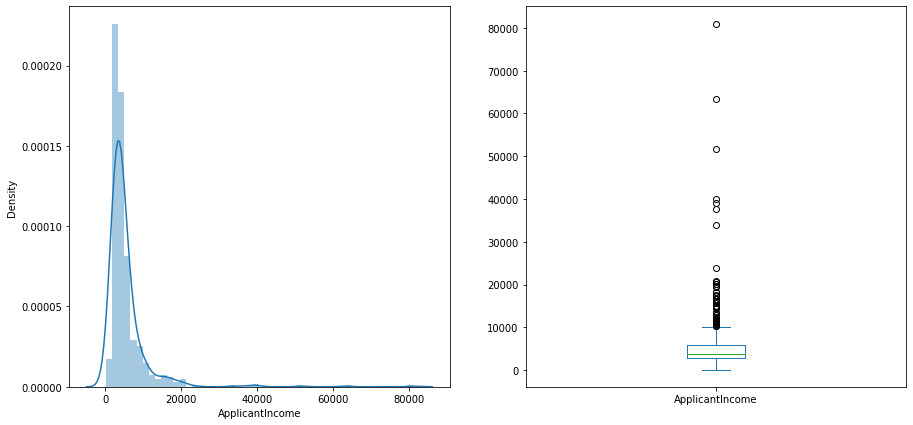

In [14]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(15,7))
plt.show()

It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed:

Let’s look at the distribution of the LoanAmount variable.

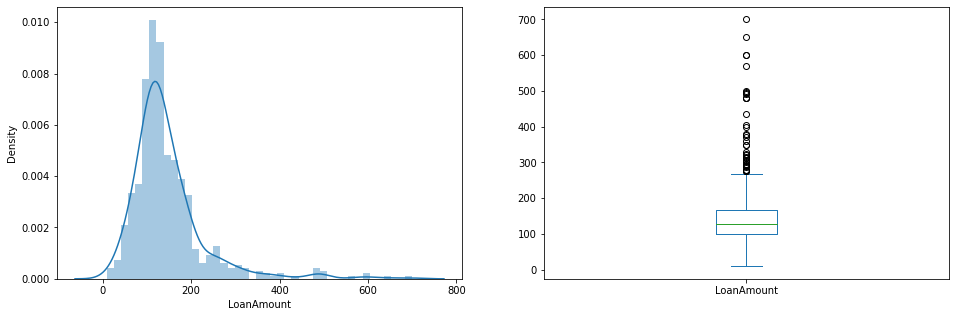

In [15]:
plt.figure(1)
plt.subplot(1,2,1)
df=train.dropna()   #used to drop null values
sns.distplot(train['LoanAmount'])
plt.subplot(1,2,2)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlates with Loan Status. So, in the next section, we will look at the bivariate analysis.

#Bivariate Analysis
Let’s recall some of the hypotheses that we generated earlier:

1. Applicants with high incomes should have more chances of loan approval.

2. Applicants who have repaid their previous debts should have higher chances of loan approval.

3. Loan approval should also depend on the loan amount. If the loan amount is less, the chances of loan approval should be high.

4. Lesser the amount to be paid monthly to repay the loan, the higher the chances of loan approval.

Let’s try to test the above-mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

#Categorical Independent Variable vs Target Variable

First of all, we will find the relation between the target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

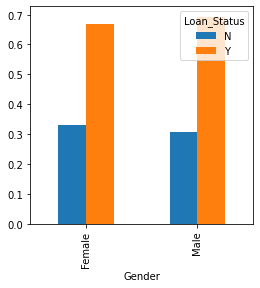

In [16]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()

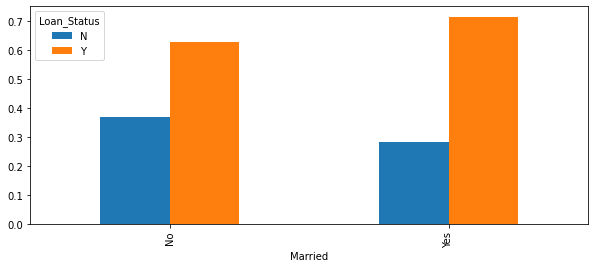

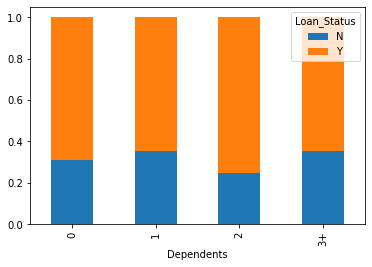

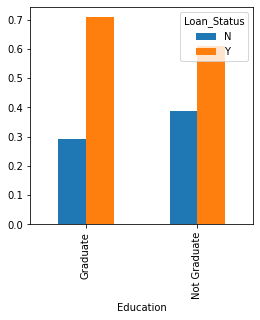

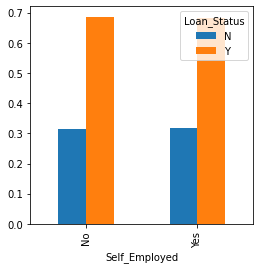

In [17]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(10,4))
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4)) 
plt.show()

The proportion of married applicants is higher for the approved loans.
The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between the remaining categorical independent variables and Loan_Status.

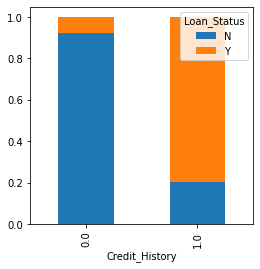

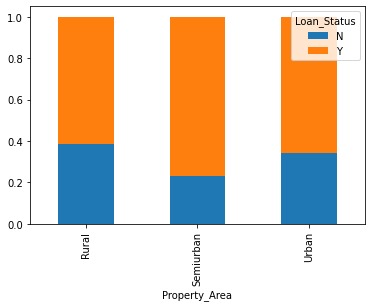

In [18]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

1. It seems people with a credit history of 1 are more likely to get their loans approved.

2. The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.


Now let’s visualize numerical independent variables with respect to the target variable.

#Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

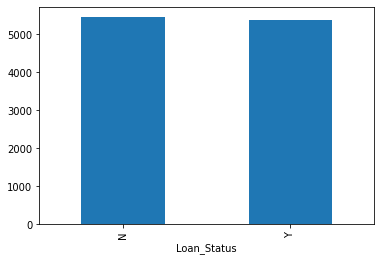

In [19]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [20]:
bins=[0,2000,4000,5000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

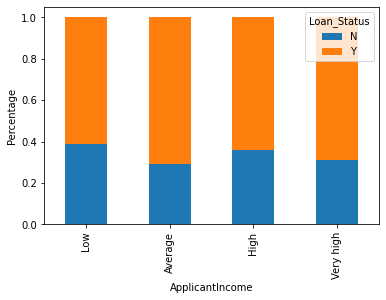

In [21]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

**It can be inferred that Applicant’s income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant’s income is high the chances of loan approval will also be high.**

We will analyze the CO-applicant’s income and loan amount variable in a similar manner.

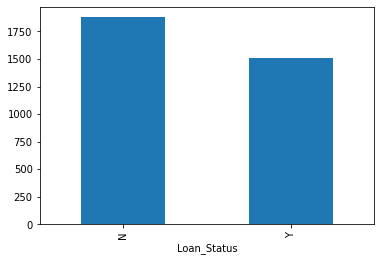

In [22]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()

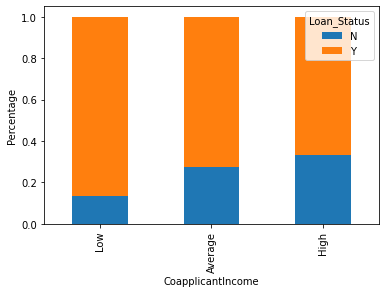

In [23]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

It shows that if co-applicants income is less the chances of loan approval are high. 

But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

So we can make a new variable in which we will combine the applicant’s and co applicants’ income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

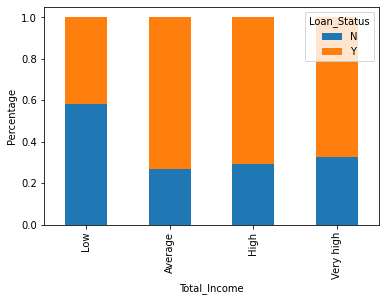

In [24]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High, and Very High Income.

Let’s visualize the Loan amount variable.

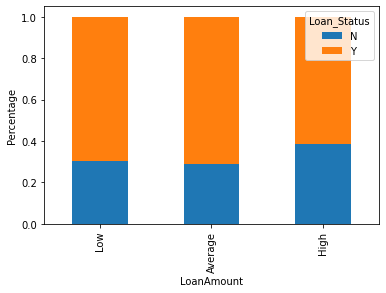

In [25]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of High Loan Amounts which supports our hypothesis which considered that the chances of loan approval will be high when the loan amount is less.

In [26]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker colors mean their correlation is more.

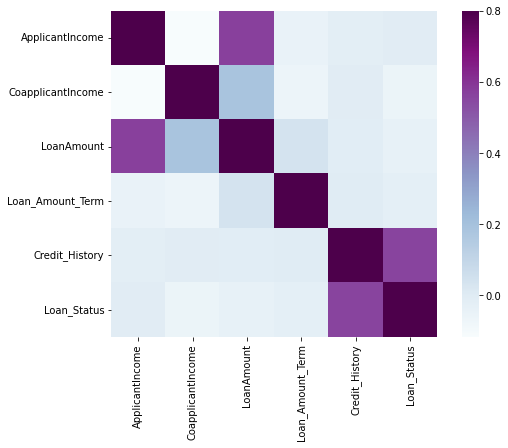

In [27]:
matrix = train.corr() 
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome – LoanAmount) and (Credit_History – Loan_Status).

 LoanAmount is also correlated with CoapplicantIncome.

#Missing Value and Outlier Treatment

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can adversely affect the model performance.

Missing Value Imputation

Let’s list out the feature-wise count of missing values.

In [28]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:


*   For numerical variables: imputation using mean or median
*   For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.



In [29]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**It can be seen that in the loan amount term variable, the value of 360 is repeated the most. So we will replace the missing values in this variable using the mode of this variable.**

In [31]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable.

 As it is a numerical variable, we can use the mean or median to impute the missing values.
 
  We will use the median to fill the null values as earlier we saw that “loan amount” have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [32]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now let’s check whether all the missing values are filled in the dataset

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [34]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

#Outlier Treatment
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let’s examine what can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58

Median = 2.5

Mode = 2

Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode = 2

Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to the normal distribution.

Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.

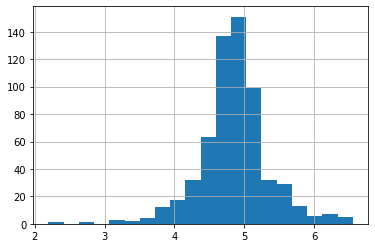

In [35]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

#Evaluation Metrics for Classification
The process of model building is not complete without the evaluation of model performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. The lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:



*   Accuracy:-  Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is what a confusion matrix looks like:



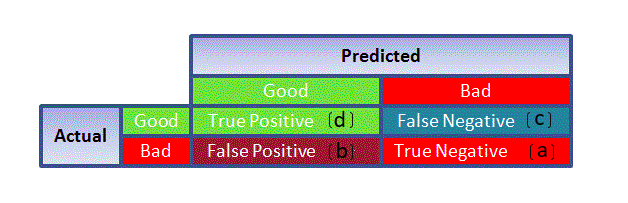





*   True Positive – Targets which are actually true(Y) and we have predicted them as true(Y)
*   True Negative – Targets that are actually false(N) and we have predicted them as false(N)


*   False Positive – Targets that are actually false(N) but we have predicted them as true(T)
*   False Negative – Targets that are actually true(T) but we have predicted them as false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

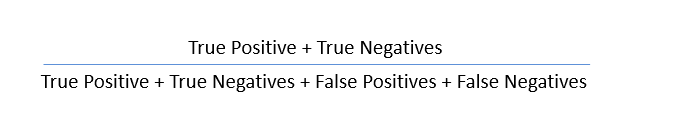



*  Precision:-: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true
                                   Precision = TP / (TP + FP)

*   Recall(Sensitivity):-  It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
                                          Recall = TP / (TP + FN)
*   Specificity:-  It is a measure of how many observations of false class are labeled correctly.
                                         Specificity = TN / (TN + FP)









Specificity and Sensitivity play a crucial role in deriving the ROC curve.

*   ROC curve
*   Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade-offs between true positive rate (sensitivity) and false-positive rate(1- specificity).

*  The area under the curve (AUC), referred to as an index of accuracy(A) or concordance index, is a perfect performance metric for the ROC curve. Higher the area under the curve, the better the prediction power of the model.

This is what a ROC curve looks like:


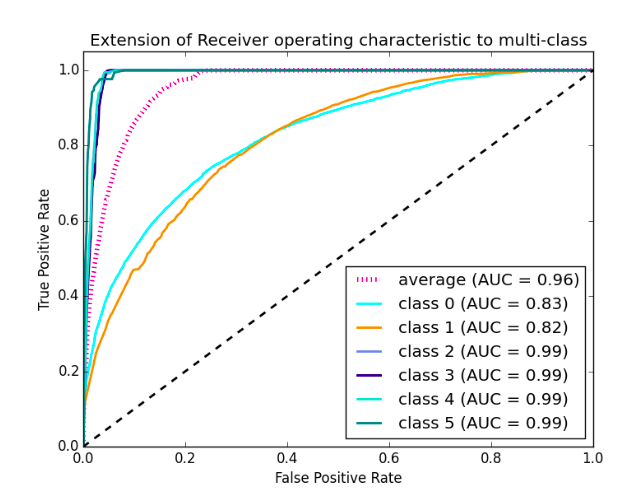




*   The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
*   So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.

*   We want to increase the area of the curve which will be maximum for classes 2,3,4 and 5 in the above example.
*   For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false-positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.

*   The class 2,3,4 and 5 models will predict more accurately as compared to the class 0 and 1 models as the AUC is more for those classes.

On the competition’s page, it has been mentioned that our submission data would be evaluated based on accuracy. Hence, we will use accuracy as our evaluation metric.


#Model Building: Part 1
Let us make our first model predict the target variable. We will start with Logistic Regression which is used for predicting binary outcomes.

* Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
* Logistic regression is an estimation of the Logit function. The logit function is simply a log of odds in favor of the event.
* This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

Let’s drop the Loan_ID variable as it does not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.





In [36]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

We will use **scikit-learn (sklearn**) for making different models which is an open-source library for Python. It is one of the most efficient tools which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.

In [37]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. A dummy variable turns categorical variables into a series of 0 and 1, making them a lot easier to quantify and compare. Let us understand the process of dummies first:

* Consider the “Gender” variable. It has two classes, Male and Female.
* As logistic regression takes only the numerical values as input, we have to change male and female into a numerical value.
* Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
* Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [38]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

Now we will train the model on the training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is can divide our train dataset into two parts: train and validation. We can train the model on this training part and using that make predictions for the validation part. In this way, we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So first, let us import train_test_split.

The dataset has been divided into training and validation parts. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [40]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

Here the C parameter represents the inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. To learn about other parameters, refer here:

Let’s predict the Loan_Status for the validation set and calculate its accuracy.

In [41]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [42]:
pred_cv = model.predict(x_cv)

Let us calculate how accurate our predictions are by calculating the accuracy.

In [43]:
accuracy_score(y_cv,pred_cv)

0.7621621621621621

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [44]:
pred_test = model.predict(test)

Let’s import the submission file which we have to submit on the solution checker.


In [45]:
submission=pd.read_csv("/content/drive/MyDrive/Loan_Datasets/sample_submission_49d68Cx.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of the test dataset and the predictions that we made, i.e., pred_test respectively.

In [46]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [47]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Finally, we will convert the submission to .csv format and make a submission to check the accuracy on the leaderboard.

In [48]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

From this submission, we got an accuracy of 0.7847 on the leaderboard.

Instead of creating a validation set, we can also make use of cross-validation to validate our predictions. We will learn about this technique in the next section.

#Logistic Regression Using Stratified k-folds Cross-validation
To check how robust our model is to unseen data, we can use Validation. It is a technique that involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it. Some of the common methods for validation are listed below:


*   The validation set approach
*   k-fold cross-validation
*   Leave one out cross-validation (LOOCV)
*   Stratified k-fold cross-validation

In this section we will learn about stratified k-fold cross-validation. . Let us understand how it works:

*  Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.

*  For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises about half the instances.
*  It is generally a better approach when dealing with both bias and variance.
*  A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance.

Below is the visualization of a stratified k-fold validation when k=5.

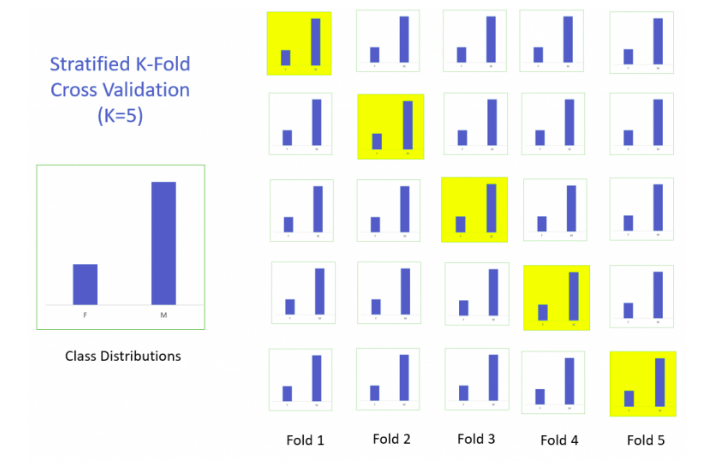

 



Let’s import StratifiedKFold from sklearn and fit the model.

In [49]:
from sklearn.model_selection import StratifiedKFold

Now let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.

In [50]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(solver='liblinear')
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

n1 of kfold 5
accuracy_score 0.8130081300813008
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7967479674796748
n4 of kfold 5
accuracy_score 0.8211382113821138
n5 of kfold 5
accuracy_score 0.7950819672131147


The mean validation accuracy for this model turns out to be 0.79. 

Let us visualize the roc curve.

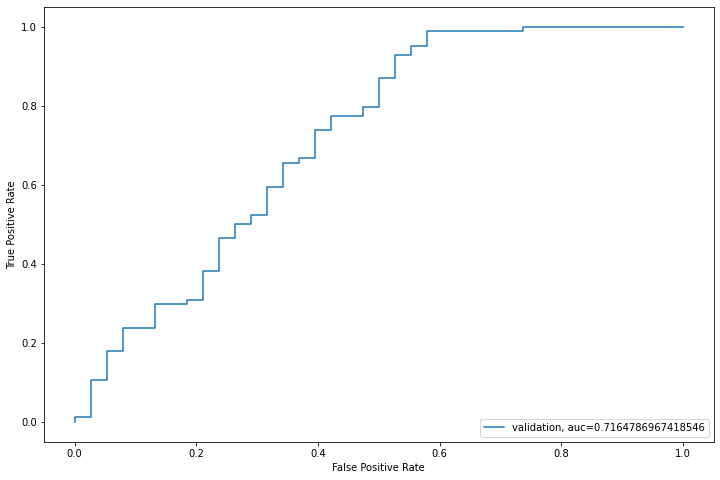

In [51]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4)
plt.show()

We got an AUC value of 0.73.

In [52]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N

In [53]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Let’s convert the submission to .csv format and make a submission to check the accuracy on the leaderboard.

In [54]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

From this submission, we got an accuracy of 0.78472 on the leaderboard. Now we will try to improve this accuracy using different approaches.

#Feature Engineering
Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

* Total Income:- As discussed
during bivariate analysis we will combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan
approval might also be high.
* EMI:- EMI is the monthly amount to
be paid by the applicant to repay the loan. The idea behind making this
variable is that people who have high EMI’s might find it difficult to
pay back the loan. We can calculate the EMI by taking the ratio of loan
amount with respect to loan amount term.
* Balance Income:- This
is the income left after the EMI has been paid. The idea behind creating
this variable is that if this value is high, the chances are high that a
person will repay the loan and hence increasing the chances of loan
approval.

In [55]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Let’s check the distribution of Total Income

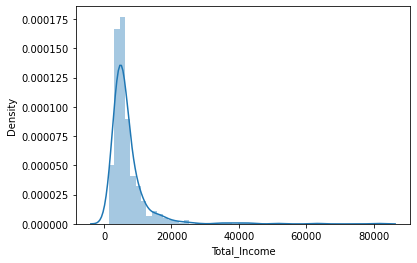

In [56]:
sns.distplot(train['Total_Income']);

We can see it is shifted towards the left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

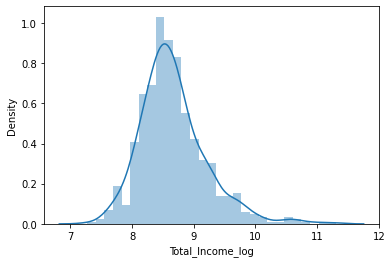

In [57]:
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s create the EMI feature now

In [58]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Let’s check the distribution of the EMI variable.

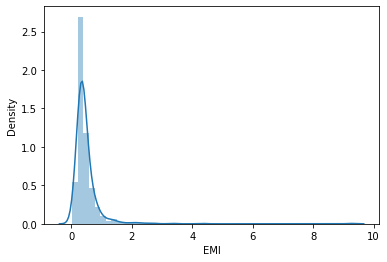

In [59]:
sns.distplot(train['EMI']);

Let us create the Balance Income feature now and check its distribution.

In [60]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) 
# Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

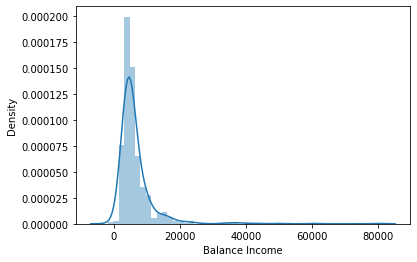

In [61]:
sns.distplot(train['Balance Income']);

Let us now drop the variables which we used to create these new features. The reason for doing this is, that the correlation between those old features and these new features will be very high, and logistic regression assumes that the variables are not highly correlated. We also want to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [62]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)

#Model Building: Part 2
After creating new features, we can continue the model-building process. So we will start with the decision tree model and then move over to more complex models like RandomForest and XGBoost.

We will build the following models in this section.

* Decision Tree
* Random Forest
* XGBoost

Let’s prepare the data for feeding into the models.

In [63]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

#Decision Tree
A decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on the most significant splitter/differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [64]:
from sklearn import tree

Let’s fit the decision tree model with 5 folds of cross-validation.

In [65]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test) 

n1 of kfold 5
accuracy_score 0.7398373983739838
n2 of kfold 5
accuracy_score 0.6991869918699187
n3 of kfold 5
accuracy_score 0.7560975609756098
n4 of kfold 5
accuracy_score 0.7073170731707317
n5 of kfold 5
accuracy_score 0.6721311475409836


The mean validation accuracy for this model is 0.69

In [66]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [67]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [68]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

We got an accuracy of 0.69 which is much lesser than the accuracy of the Decision tree model. So let’s build another model, i.e. Random Forest, a tree-based ensemble algorithm and try to improve our model by improving the accuracy.

#Random Forest
* RandomForest is a tree-based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
* For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
*  The final prediction can be a function of all the predictions made by the individual learners.
*  In the case of a regression problem, the final prediction can be the mean of all the predictions.

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(test)

n1 of kfold 5
accuracy_score 0.8292682926829268
n2 of kfold 5
accuracy_score 0.8130081300813008
n3 of kfold 5
accuracy_score 0.7723577235772358
n4 of kfold 5
accuracy_score 0.8048780487804879
n5 of kfold 5
accuracy_score 0.7540983606557377


The mean validation accuracy for this model is 0.766

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyperparameters. Grid-search is a way to select the best of a family of hyperparameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in the random forest model.

In [71]:
from sklearn.model_selection import GridSearchCV

# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

In [78]:
!pip install scikit-learn-intelex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn_intelex-2021.6.3-py37-none-manylinux1_x86_64.whl (87 kB)
     |████████████████████████████████| 26.0 MB 1.3 MB/s 
     |████████████████████████████████| 300.3 MB 20 kB/s 
     |████████████████████████████████| 4.0 MB 73.2 MB/s 


In [79]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 
                    'n_estimators': list(range(1, 200, 20))}

In [80]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split

In [81]:
# Fit the grid search model 
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [82]:
GridSearchCV(cv=None, error_score='raise',       
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, 
                criterion='gini', max_depth=None, max_features='auto', 
                max_leaf_nodes=None, min_impurity_decrease=0.0, 
min_impurity_split=None,min_samples_leaf=1, min_samples_split=2, 
min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, 
random_state=1, verbose=0, warm_start=False),fit_params=None, iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
     'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       

pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)


TypeError: ignored

# Estimating the optimized value

In [ ]:
grid_search.best_estimator_

So, the optimized value for the max_depth variable is 3 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 

pred_test = model.predict(test) 
pred2 =  model.predict_proba(test[:,1]


In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random  Forest.csv')

We got an accuracy of 0.7638 from the random forest model on the leaderboard.

Let us find the feature importance now, i.e. which features are most important for this problem. We will use the feature_importances_ attribute of sklearn to do so.

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, and EMI. So, feature engineering helped us in predicting our target variable.

#XGBOOST
XGBoost is a fast and efficient algorithm and has been used by the winners of many data science competitions. It’s a boosting algorithm and you may refer to the below article to know more about boosting:

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

* n_estimator: This specifies the number of trees for the model.
* max_depth: We can specify the maximum depth of a tree using this parameter.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    i+=1 

In [ ]:
pred_test = model.predict(test)
pred2 =  model.predict_proba(test[:,1]

The mean validation accuracy for this model is 0.79.

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')

We got an accuracy of 0.73611 with this model. I hope this article was helpful for you in understanding how a machine learning competition is approached and what are the steps one should go through to build a robust model. So, do replicate this analysis and let us know if you face any issues.

#Conclusion
There are still quite a many things that can be tried to improve our models’ predictions. We create and add more variables, try different models with a different subset of features and/or rows, etc. Some of the ideas are listed below

* We can train the XGBoost model using grid search to optimize its hyperparameters and improve its accuracy.
* We can combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
* We can also make independent vs independent variable visualizations to discover some more patterns.
* We can also arrive at the EMI using a better formula which may include interest rates as well.
* We can even try ensemble modeling (a combination of different models). 

To read more about ensemble techniques you can refer to these articles
Keytakeaways
1. understand the real problem
2. Exploratory Data Analysis (EDA) and Pre-Processing
3. understand the concept of univariate, bivariate
4. how to find outlier points from data
5. how to evaluate model using metrics
6. we also learn a few techniques of feature engineering
7. Model building with few algorithms